In [158]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD

In [159]:
sess = tf.Session()
init_var = tf.global_variables_initializer()
sess.run(init_var)

In [160]:
# Load data
inputs = np.genfromtxt ('basf_inputs_rand_normalized.csv', delimiter=",")
targets = np.genfromtxt ('basf_targets_rand_normalized.csv', delimiter=",")

print(inputs[0:2, :])
print(targets[0:2])

[[3.         4.         1.         1.         0.65765766 0.25
  1.         0.8        0.         0.57142857 0.40765391 1.        ]
 [7.         4.         1.         3.         0.65765766 0.25
  0.93366093 0.         1.         1.         0.66139767 0.5       ]]
[0.33097762 0.26266196]


In [166]:
data = inputs

print("Number of examples: %i" % n)
print(data.shape)
print(data[0:2, :])

Number of examples: 1029
(1029, 12)
[[3.         4.         1.         1.         0.65765766 0.25
  1.         0.8        0.         0.57142857 0.40765391 1.        ]
 [7.         4.         1.         3.         0.65765766 0.25
  0.93366093 0.         1.         1.         0.66139767 0.5       ]]


In [167]:
def convert_to_onehot(data):
    one_hots = []
    for i in range(4):
        depth = np.max(data[:, i])
        indicies = data[:, i]
        casted_indicies = tf.cast(indicies, tf.int32)
        one_hot = tf.one_hot(casted_indicies, depth)
        one_hots.append(one_hot)
    concat_one_hot = tf.concat(one_hots[:], 1)
    onehot_data = tf.concat([concat_one_hot, data[:, 4:]], 1)
    print(sess.run(onehot_data))
    print(onehot_data.shape)
    return onehot_data
    
onehot_data = convert_to_onehot(data)

[[0.         0.         0.         ... 0.5714286  0.4076539  1.        ]
 [0.         0.         0.         ... 1.         0.6613977  0.5       ]
 [0.         0.         1.         ... 0.5714286  0.7121464  0.33333334]
 ...
 [0.         0.         0.         ... 0.71428573 0.36439267 1.        ]
 [0.         0.         0.         ... 0.5714286  0.42845258 0.33333334]
 [0.         1.         0.         ... 0.5714286  0.68053246 0.5       ]]
(1029, 25)


In [178]:
training_x = onehot_data[0:800, :]
training_y = targets[0:800]
validation_x = onehot_data[800:1000, :]
validation_y = targets[800:1000]
test_x = onehot_data[1000:, :]
test_y = targets[1000:]

print(training_x.shape)
print(validation_x.shape)
print(test_x.shape)

print(sess.run(training_x[0:2, :]))
print(sess.run(validation_x[0:2, :]))
print(sess.run(test_x[0:2, :]))

(800, 25)
(200, 25)
(29, 25)
[[0.        0.        0.        1.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  1.        0.        0.        0.6576577 0.25      1.        0.8
  0.        0.5714286 0.4076539 1.       ]
 [0.        0.        0.        0.        0.        0.        0.
  1.        0.        0.        0.        0.        0.        0.
  0.        0.        1.        0.6576577 0.25      0.9336609 0.
  1.        1.        0.6613977 0.5      ]]
[[0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         1.
  1.         0.         1.         0.         0.         0.53783786
  1.         0.8108108  0.8        0.         0.5714286  0.39767054
  0.75      ]
 [0.         0.         0.         0.         0.         1.
  0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.         1.         0.5315315
  0.25       0.9336609  0.8        0

In [170]:
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=25))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.add(Dense(1))

sgd = SGD(lr=0.1)
model.compile(sgd, loss='mean_squared_error')
history = model.fit(training_x, training_y, validation_data=(validation_x, validation_y), validation_steps=10, steps_per_epoch=44, epochs=100)

Train on 799 samples, validate on 199 samples
Epoch 1/100
44/44 [==============================] - 0s 6ms/step - loss: 0.0611 - val_loss: 0.0486
Epoch 2/100
44/44 [==============================] - 0s 753us/step - loss: 0.0418 - val_loss: 0.0472
Epoch 3/100
44/44 [==============================] - 0s 737us/step - loss: 0.0406 - val_loss: 0.0461
Epoch 4/100
44/44 [==============================] - 0s 711us/step - loss: 0.0397 - val_loss: 0.0452
Epoch 5/100
44/44 [==============================] - 0s 695us/step - loss: 0.0389 - val_loss: 0.0442
Epoch 6/100
44/44 [==============================] - 0s 687us/step - loss: 0.0380 - val_loss: 0.0432
Epoch 7/100
44/44 [==============================] - 0s 680us/step - loss: 0.0372 - val_loss: 0.0421
Epoch 8/100
44/44 [==============================] - 0s 690us/step - loss: 0.0363 - val_loss: 0.0409
Epoch 9/100
44/44 [==============================] - 0s 673us/step - loss: 0.0354 - val_loss: 0.0397
Epoch 10/100
44/44 [===========================

Epoch 81/100
44/44 [==============================] - 0s 666us/step - loss: 0.0040 - val_loss: 0.0049
Epoch 82/100
44/44 [==============================] - 0s 671us/step - loss: 0.0040 - val_loss: 0.0048
Epoch 83/100
44/44 [==============================] - 0s 722us/step - loss: 0.0039 - val_loss: 0.0048
Epoch 84/100
44/44 [==============================] - 0s 734us/step - loss: 0.0038 - val_loss: 0.0047
Epoch 85/100
44/44 [==============================] - 0s 667us/step - loss: 0.0038 - val_loss: 0.0047
Epoch 86/100
44/44 [==============================] - 0s 668us/step - loss: 0.0037 - val_loss: 0.0047
Epoch 87/100
44/44 [==============================] - 0s 666us/step - loss: 0.0037 - val_loss: 0.0046
Epoch 88/100
44/44 [==============================] - 0s 686us/step - loss: 0.0036 - val_loss: 0.0046
Epoch 89/100
44/44 [==============================] - 0s 669us/step - loss: 0.0037 - val_loss: 0.0047
Epoch 90/100
44/44 [==============================] - 0s 669us/step - loss: 0.0040

In [171]:
print("MSE: %.8f" % model.evaluate(test_x, test_y, steps=128))

128/128 [==============================] - 0s 473us/step
MSE: 0.00411713


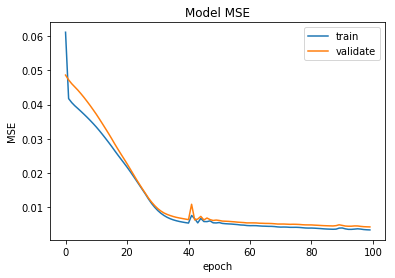

In [172]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')
plt.show()

In [179]:
training_x = onehot_data[0:750, :]
training_y = targets[0:750]
validation_x = onehot_data[750:1000, :]
validation_y = targets[750:1000]
test_x = onehot_data[1000:, :]
test_y = targets[1000:]

In [181]:
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=25))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.add(Dense(1))

sgd = SGD(lr=0.1)
model.compile(sgd, loss='mean_squared_error')
history = model.fit(training_x, training_y, validation_data=(validation_x, validation_y), validation_steps=10, steps_per_epoch=44, epochs=100)

Train on 750 samples, validate on 250 samples
Epoch 1/100
44/44 [==============================] - 0s 8ms/step - loss: 0.0419 - val_loss: 0.0418
Epoch 2/100
44/44 [==============================] - 0s 772us/step - loss: 0.0391 - val_loss: 0.0406
Epoch 3/100
44/44 [==============================] - 0s 704us/step - loss: 0.0380 - val_loss: 0.0396
Epoch 4/100
44/44 [==============================] - 0s 705us/step - loss: 0.0371 - val_loss: 0.0387
Epoch 5/100
44/44 [==============================] - 0s 691us/step - loss: 0.0362 - val_loss: 0.0378
Epoch 6/100
44/44 [==============================] - 0s 685us/step - loss: 0.0353 - val_loss: 0.0369
Epoch 7/100
44/44 [==============================] - 0s 677us/step - loss: 0.0344 - val_loss: 0.0360
Epoch 8/100
44/44 [==============================] - 0s 678us/step - loss: 0.0334 - val_loss: 0.0350
Epoch 9/100
44/44 [==============================] - 0s 688us/step - loss: 0.0325 - val_loss: 0.0341
Epoch 10/100
44/44 [===========================

Epoch 81/100
44/44 [==============================] - 0s 671us/step - loss: 0.0039 - val_loss: 0.0043
Epoch 82/100
44/44 [==============================] - 0s 659us/step - loss: 0.0039 - val_loss: 0.0043
Epoch 83/100
44/44 [==============================] - 0s 671us/step - loss: 0.0039 - val_loss: 0.0043
Epoch 84/100
44/44 [==============================] - 0s 672us/step - loss: 0.0038 - val_loss: 0.0043
Epoch 85/100
44/44 [==============================] - 0s 675us/step - loss: 0.0038 - val_loss: 0.0043
Epoch 86/100
44/44 [==============================] - 0s 678us/step - loss: 0.0038 - val_loss: 0.0043
Epoch 87/100
44/44 [==============================] - 0s 678us/step - loss: 0.0038 - val_loss: 0.0043
Epoch 88/100
44/44 [==============================] - 0s 683us/step - loss: 0.0038 - val_loss: 0.0043
Epoch 89/100
44/44 [==============================] - 0s 675us/step - loss: 0.0038 - val_loss: 0.0043
Epoch 90/100
44/44 [==============================] - 0s 676us/step - loss: 0.0038

In [182]:
print("MSE: %.8f" % model.evaluate(test_x, test_y, steps=128))

128/128 [==============================] - 0s 530us/step
MSE: 0.00344710


In [183]:
training_x = onehot_data[0:750, :]
training_y = targets[0:750]
validation_x = onehot_data[750:1000, :]
validation_y = targets[750:1000]
test_x = onehot_data[1000:, :]
test_y = targets[1000:]